## Linear Regression and the DAX

We provide a simple example of a linear regression in the DAX.

* Cool - we can download DAX data with yahoo Finance
* it is quite easy to play around



In [5]:
# we first import the needed libraries

import yfinance as yf            # Yahoo Finance 
import matplotlib.pyplot as plt  # For plotting data
import matplotlib.dates as mdates

# if the import command fails it might be the case that you have not locally installed 
# the libraries. You can do this often by pip3 install libraryname


In [6]:
# We use yahoo Finance for the download

DAX = yf.Ticker('%5Egdaxi')  # You need to look the ticker up on the website of yahoo finance
DAX_History = DAX.history(start="2020-01-01", end="2024-04-16")
DAX_History.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00+01:00,13233.709961,13425.030273,13225.160156,13385.929688,75341400,0.0,0.0
2020-01-03 00:00:00+01:00,13266.389648,13282.740234,13120.719727,13219.139648,80793400,0.0,0.0
2020-01-06 00:00:00+01:00,13085.490234,13143.110352,12948.169922,13126.990234,71778600,0.0,0.0
2020-01-07 00:00:00+01:00,13199.589844,13283.879883,13166.400391,13226.830078,78282300,0.0,0.0
2020-01-08 00:00:00+01:00,13140.490234,13334.040039,13106.269531,13320.179688,88178800,0.0,0.0


Text(0.5, 1.0, 'DAX Price')

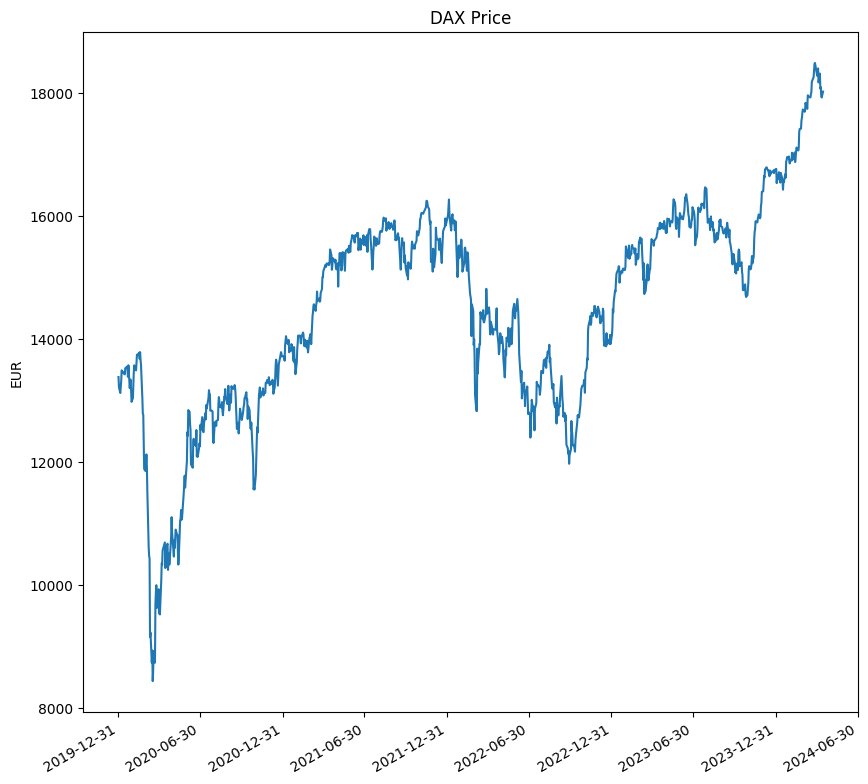

In [7]:
# Now we plot the data

# first we convert the dates
dates = DAX_History.index.to_pydatetime()

plt.figure(figsize=(10,10))
plt.plot(dates, DAX_History['Close'].values)

# Improve date ticks to prevent overlap
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()  

plt.xlabel("")
plt.ylabel("EUR")
plt.title("DAX Price")

In [8]:
# Alternatives

# SAP = yf.Ticker('SAP')
# SAP_History = SAP.history(start="2020-01-01", end="2020-10-26")
# SAP_History.head()   # todays value still missing !

# SP500 = yf.Ticker('^GSPC')
# SP500_History = SP500.history(start="2020-01-01", end="2020-10-26")
# SP500_History.head()

## Forecasting the next day 

is a linear fit a good idea ? Lets check by a plot

* For more information on regression in python see: https://realpython.com/linear-regression-in-python/

Text(0.5, 1.0, 'DAX Price - 1 day ahead')

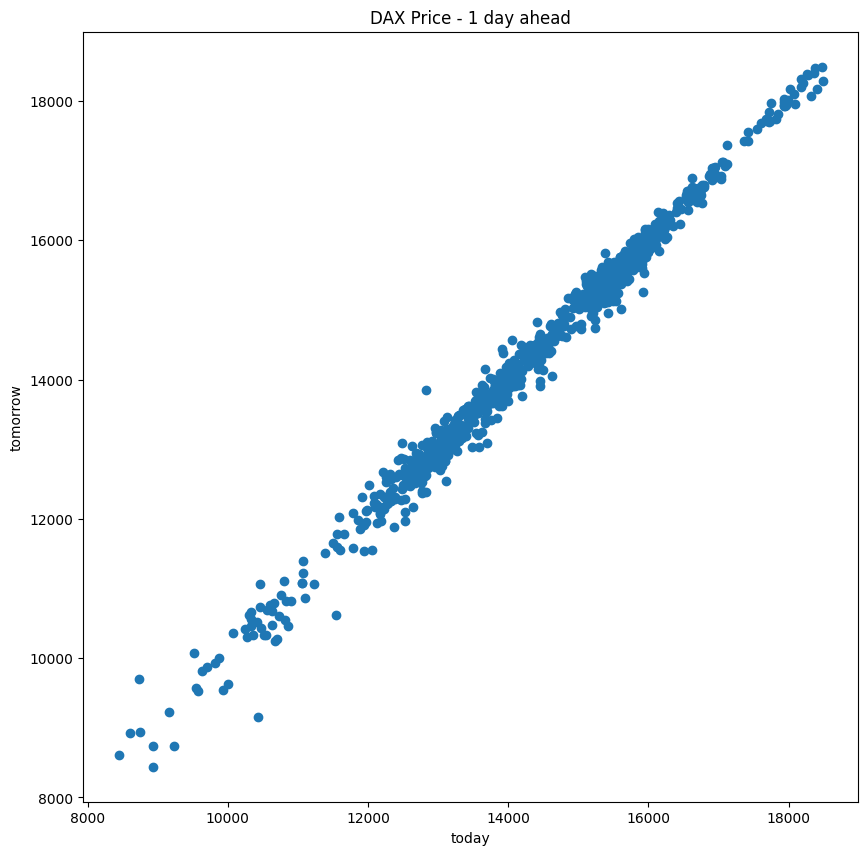

In [9]:
# Linear Regression example: regress tomorrow on today

x = DAX_History['Close'][:-1]    # without the last value
y = DAX_History['Close'][1:]     # without the first value

plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel("today")
plt.ylabel("tomorrow")
plt.title("DAX Price - 1 day ahead")

In [13]:
# we need some packages
import numpy as np
from numpy import array
from sklearn.linear_model import LinearRegression


In [21]:
model = LinearRegression()
x = array(x).reshape(-1,1)   # The linear regression wants numpy arrays
y = array(y).reshape(-1,1)
model.fit(x, y)

print("model fitted")

model fitted


In [22]:
r_sq = model.score(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('coefficient of determination:', r_sq)

intercept: [54.50390102]
slope: [[0.9965289]]
coefficient of determination: 0.9895471946888447


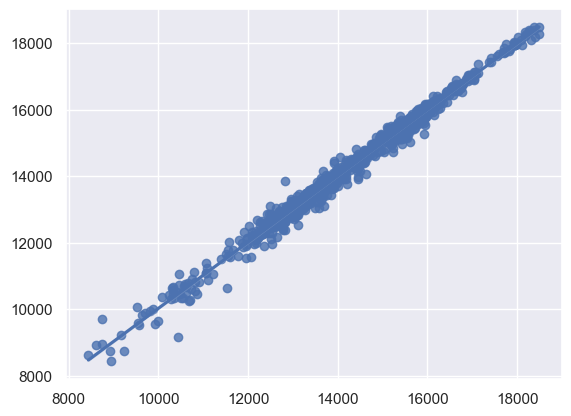

In [25]:

# Give a very nice plot
import seaborn as sns; sns.set_theme(color_codes=True)

ax = sns.regplot(x=x, y=y)

plt.show()
# plt.savefig("DAX_regression.pdf")
